In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
import matplotlib.scale as mscale
#np.set_printoptions(threshold=sys.maxsize)
M = 1000
H_to_K = 1/0.000003166808534191
hbar = 1
m = 100
tol = 1e-6

# Analytic Wave functions
# $\varphi_{n}(x) = \sqrt{\frac{2}{a}}sin(\frac{n \pi}{a} x), n=1,2,3,...$
# $E_{n} = \frac{n^2 \pi^2 \hbar^2}{2 m a^2}$

(0.0, 50.0)

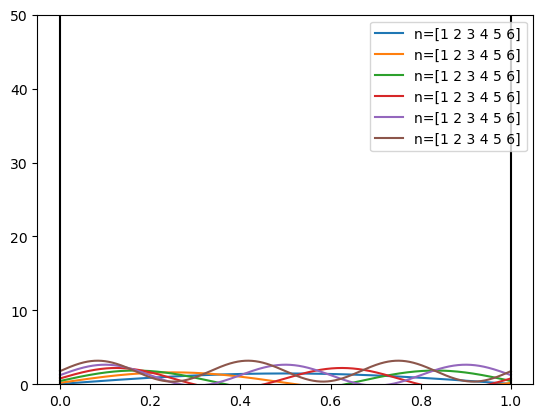

In [3]:
Vc = 7
dx = 1e-3
a = 1

N = int(2*np.sqrt(2*Vc)*(1/dx)) # Number of pts
if N % 2 == 0: # require N odd for symmetry around 0
     N += 1
        
xmn = 0 # xmin determined by Vc
xmx = a # xmax determined by Vc
x = np.linspace(xmn, xmx, N)





n = np.arange(1, 7, 1)

En = ((n**2)*(np.pi**2)*(hbar**2))/(2*m*a**2)

for i in range(len(n)):
    phi = np.sqrt(2/a)*np.sin(((n[i]*np.pi)/a)*x)
    plt.plot(x, phi + En[i], label = f'n={n}')
    assert(np.trapz(np.abs(phi)**2,x) - 1 < tol)

plt.vlines(0,0,100, color = 'black')
plt.vlines(a, 0, 100, color = 'black')

plt.legend()
plt.ylim(0,50)

In [4]:
def Hamiltonian_DVR(dx, Vc, L):
    # Build the Hamiltonian Matrix for Harmonic Oscillator using DVR
    # Takes in a xmin and xmax to build a grid, a spacing dx, and a cutoff energy Vc
    
    N = int(2*np.sqrt(2*Vc)*(1/dx)) # Number of pts
    if N % 2 == 0: # require N odd for symmetry around 0
        N += 1
        
    xmin = 0 # xmin determined by Vc
    xmax = L # xmax determined by Vc
    xp = np.linspace(xmin, xmax, N) # box to determine Hamiltonian

    
    
    
    #print(f' len(xp) = {len(xp)}')
    
    H_DVR = np.zeros((len(xp),len(xp))) # Initialize an empty matrix of zeros

    #print(f' shape of xp = {print(xp)}')
    #print(f' shape of H = {H_DVR.shape}')
    #print(H_DVR[0][0:3])
    print(f' N = {N}')
    #print(f' len(xp) = {len(xp)}')
    #print(f' len(H) = {len(H_DVR)}, len(H[0]) = {len(H_DVR[0])}')
    #print(f' iterator range is {2*max(range(len(xp)/2), int(len(xp)/2) + 1))}')

    offset = 0 # offset to ensure mapping is correct
    for i in range(0, N): # let i be the rows, start on a row, from -len(xp)/2 to len(xp)/2
        
        for j in range(0, N): # Let j be the columns, for a given row i, run along columns and calculate Hij
           
            if i == j: # This will calculate diagonal components of H
                H_DVR[i + offset][j + offset] = 0.5*(np.pi**2)*(1/3)*(1/dx)*(1/dx) # Fill out diagonal elements according to DVR method
            
            if i != j: # This will calculate off-diagonal components of H
                H_DVR[i + offset][j + offset] = ((-1)**(i-j))*(1/(dx**2))*(1/((i-j)**2)) # Fill out off diagonal elements according to DVR method

    assert(np.allclose(H_DVR, np.transpose(H_DVR))) # Assert Hamilitonian is real symmetric
        

    return H_DVR

In [5]:
H = Hamiltonian_DVR(dx, Vc, a)



 N = 7483


In [6]:
Heig = np.sort(np.linalg.eigh(H)[0])
Eigvec = np.linalg.eigh(H)[1]
Hvec = []

for i in range(len(Eigvec)):
    Hvec.append(Eigvec[:,i])
print(np.trapz(np.abs(Hvec[0])**2,x))

for i in range(len(Hvec)):
    INT = np.trapz(np.abs(Hvec[i])**2, x)
    A = 1/np.sqrt(INT)
    Hvec[i] = A*Hvec[i]


print(np.trapz(np.abs(Hvec[0])**2,x))

print(Heig[0:6])
print(En)



0.00013365410317625528
0.9999999999999999
[0.08811098 0.35244393 0.79299884 1.40977571 2.20277455 3.17199536]
[0.04934802 0.19739209 0.4441322  0.78956835 1.23370055 1.77652879]


0.9999999999999999


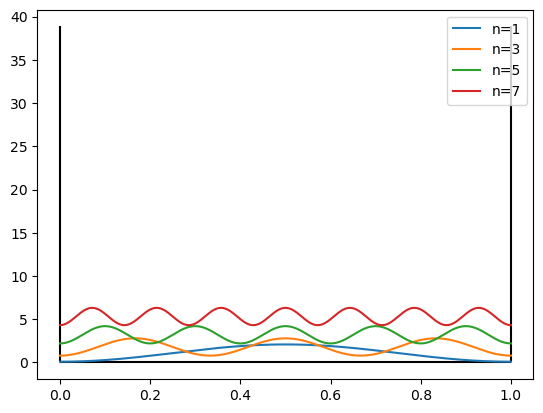

In [27]:
plt.vlines(0,0,Heig[20], color = 'black')
plt.vlines(a,0,Heig[20], color = 'black')
plt.hlines(0,0,a, color = 'black')

print(np.trapz(np.abs(Hvec[0]**2),x))

for i in range(8):
    if i % 2 == 0:
        plt.plot(x,np.abs(Hvec[i])**2 + Heig[i], label = f'n={i + 1}')


plt.legend()
